<a href="https://colab.research.google.com/github/hibabtl/DATA_ANALYSIS/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## **CUSTOMER_CHURN_PREDICTION_USING_LOGISTICREGRESSION **







1.   **SETTING** **UP ENVIRONMENT & DATA CLEANING**
### INSTALL & IMPORT ESSENTIAL LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
#DROP CUSTOMER_ID AS IT IS NOT USEFUL FOR MODEL
data.drop('customerID',axis=1, inplace=True)

In [ ]:
#CONVERTING CATEGORICAL DATA INTO BINARY
data['Churn']=data['Churn'].map({'Yes':1,'No':0})

In [ ]:
print(data['TotalCharges'].dtype)


object


In [ ]:
#ENCODE CATEGORICAL VARIABLES

# Step 3: Convert TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')


In [ ]:
data.head()
# Step 4: Drop missing values
data.dropna(inplace=True)

In [ ]:
# Step 6: Check object columns (categorical)
print(data.select_dtypes(include='object').columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [ ]:
# Step 7: Apply get_dummies safely
data = pd.get_dummies(data, columns=data.select_dtypes(include='object').columns, drop_first=True)

## **DATA CHECK**






In [ ]:
print(data.shape)
print(data.dtypes)
print(data.columns)

(7032, 31)
SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
gender_Male                                 bool
Partner_Yes                                 bool
Dependents_Yes                              bool
PhoneService_Yes                            bool
MultipleLines_No phone service              bool
MultipleLines_Yes                           bool
InternetService_Fiber optic                 bool
InternetService_No                          bool
OnlineSecurity_No internet service          bool
OnlineSecurity_Yes                          bool
OnlineBackup_No internet service            bool
OnlineBackup_Yes                            bool
DeviceProtection_No internet service        bool
DeviceProtection_Yes                        bool
TechSupport_No internet service             bool
TechSuppo

# **EDA**

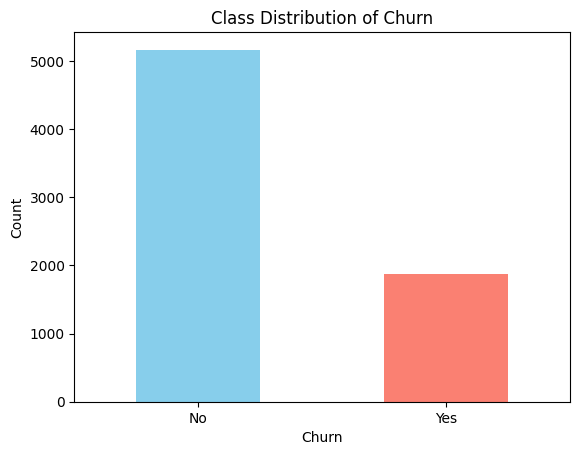

In [ ]:
#class distribution of target
data['Churn'].value_counts().plot(kind='bar', color = ['skyblue','salmon'])
plt.xticks([0,1],['No', 'Yes'], rotation=0)
plt.ylabel('Count')
plt.title('Class Distribution of Churn')
plt.show()

In [ ]:
# #CORRELATION HEATMAP
# plt.figure(figsize=(20,15))
# sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Feature Correlation Heatmap')
# plt.show()


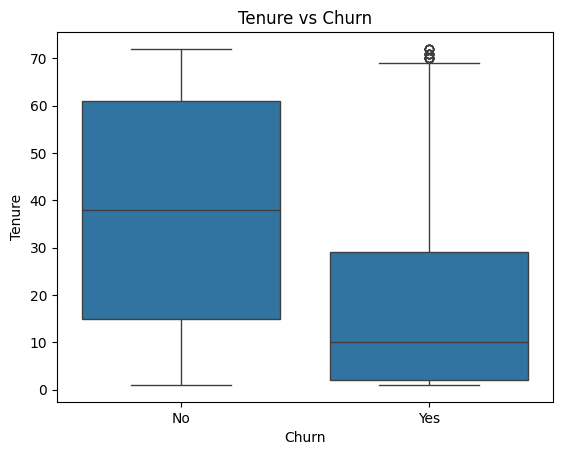

In [ ]:
#boxplot tenurevschurn
sns.boxplot(x='Churn',y='tenure',data=data)
plt.xticks([0,1],['No','Yes'], rotation = 0)
plt.ylabel('Tenure')
plt.title('Tenure vs Churn')
plt.show()

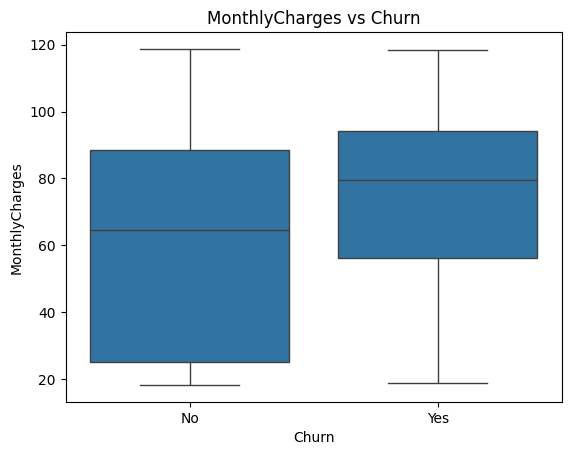

In [ ]:
#boxplot monthlychargesvschurn
sns.boxplot(x='Churn',y='MonthlyCharges',data=data)
plt.xticks([0,1],['No','Yes'], rotation = 0)
plt.ylabel('MonthlyCharges')
plt.title('MonthlyCharges vs Churn')
plt.show()

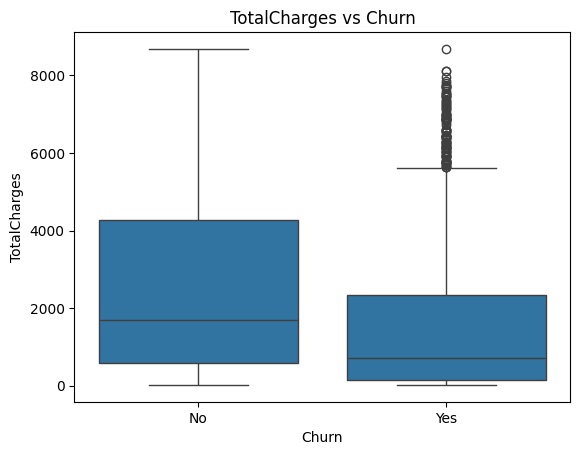

In [ ]:
#boxplot monthlychargesvschurn
sns.boxplot(x='Churn',y='TotalCharges',data=data)
plt.xticks([0,1],['No','Yes'], rotation = 0)
plt.ylabel('TotalCharges')
plt.title('TotalCharges vs Churn')
plt.show()

## **TRAIN-TEST SPLIT**




In [ ]:
#SPLIT DATA INTO TRAIN AND TEST SETS
from sklearn.model_selection import train_test_split
X=data.drop('Churn',axis=1)
y=data['Churn']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)


## **MODEL BUILDING WITH IMBALANCE AND OUTLIERS**

In [ ]:
# #FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
y.value_counts()

,count
Churn,
0,5163
1,1869


In [ ]:
# #model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model=LogisticRegression(max_iter=1000)
model.fit(X_train_scaled,y_train)

In [ ]:
# #predict
y_pred=model.predict(X_test_scaled)

In [ ]:
# #evaluation
print("Confusion matrics: \n", confusion_matrix(y_test,y_pred))

In [ ]:
print("Classification Report", classification_report(y_test,y_pred))

In [ ]:
print("Accuracy", accuracy_score(y_test,y_pred))

## **HANDLING IMBALANCED DATA USING SMOTE**

**🔹 What is SMOTE?**
SMOTE (Synthetic Minority Over-sampling Technique) creates synthetic (fake but realistic) samples of the minority class (in your case, Churn = 1) to balance the dataset.

In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#  Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Optional: Print class distribution after resampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Churn
0    4130
1    1495
Name: count, dtype: int64
After SMOTE: Churn
0    4130
1    4130
Name: count, dtype: int64


In [ ]:
#3. Fit logistic regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train_res, y_train_res)

4. Predict on test set (no SMOTE here!)
y_pred = model.predict(X_test)

In [ ]:
# 5. Evaluate performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("Accuracy", accuracy_score(y_test,y_pred))

## **detect outliers with IQR**

In [ ]:
#LIST OF NMERICAL COLUMNS
num_cols=['tenure','MonthlyCharges','TotalCharges']
# Apply IQR filtering
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

In [ ]:
#SPLIT DATA INTO TRAIN AND TEST SETS
from sklearn.model_selection import train_test_split
X=data.drop('Churn',axis=1)
y=data['Churn']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#  Apply SMOTE on training set only
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# Optional: Print class distribution after resampling
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

In [ ]:
# 3. Fit logistic regression
model = LogisticRegression(max_iter=2000)
model.fit(X_train_res, y_train_res)

# 4. Predict on test set (no SMOTE here!)
y_pred = model.predict(X_test_scaled)

In [ ]:
# 5. Evaluate performance
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

In [ ]:
print("Accuracy", accuracy_score(y_test,y_pred))